In [2]:
"""
The first step to Keras

This is modified version of the tutorial code in the Book "Deep Learning with Python"
Copyright 2017 by Manning Publications, Co.
https://github.com/fchollet/deep-learning-with-python-notebooks
Copyright: Copyright (c) 2017 François Chollet
"""

## loading data

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 3s 51us/step


In [9]:
## normalizing data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


In [12]:
import numpy as np
from keras import models, layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('processing fold #', i)
    
    # prepare the validation data
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # prepare the training data
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
         axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
         axis=0)

    # build model
    model = build_model()
    
    # train model with silent mode(verbose=0)
    model.fit(
        partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    
    # evaluate validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

print("END")
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [16]:
print(all_scores)
np.mean(all_scores)

[2.1004047936732224, 2.3386258748498294, 3.037793777956821, 2.3620392644759454]


2.459715927738954

In [17]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    
    # prepare the validation data
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # prepare the training data
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
         axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
         axis=0)

    # build model
    model = build_model()
    
    # train model with silent mode(verbose=0)
    history = model.fit(
        partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0)
    
    # evaluate validation data
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

print("END")
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
END


In [18]:
average_mae_historhy = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

No handles with labels found to put in legend.


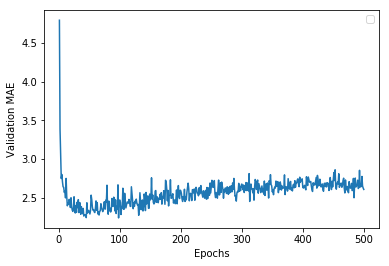

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_historhy) + 1), average_mae_historhy)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

No handles with labels found to put in legend.


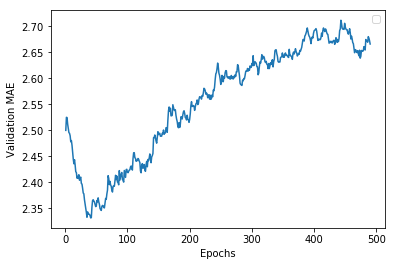

In [26]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.clf()

smooth_mae_history = smooth_curve(average_mae_historhy[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

In [28]:
# new training 
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)

# validate with test data
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print("test_mse_score = %f" % test_mse_score)
print("test_mae_score = %f" % test_mae_score)

102/102 [==============================] - 0s 3ms/step
test_mse_score = 19.695079
test_mae_score = 3.177430
